In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Ольга\\Downloads\\water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


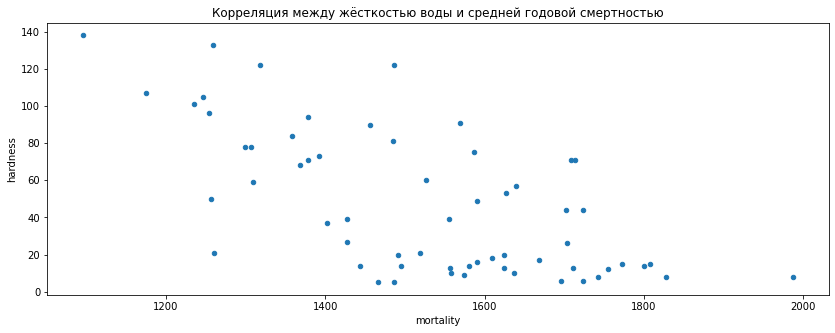

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,5
df.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью')
plt.show()

In [ ]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [10]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [11]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [12]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [ ]:
#Отрицательная корреляция – корреляция, при которой увеличение смертности связано с уменьшением жёсткостью воды, 
#Наличие противоположной связи: чем выше значение одной переменной, тем ниже значение другой.
#По Спирмену средняя корреляция, по Кендаллу слабая корреляция 

In [ ]:
#Построить модель линейной регрессии

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [154]:
X = df[['mortality']]
y = df['hardness']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
X_train.shape

(48, 1)

In [157]:
y_train.shape

(48,)

In [158]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [159]:
model.coef_

array([-0.12403806])

In [160]:
model.intercept_

235.95413244496626

In [161]:
y_pred = model.predict(X_test)
y_pred

array([81.27867099, 42.70283417, 50.51723198, 24.84135346, 73.83638736,
       34.39228411, 79.79021426, 39.10573041, 47.54031853, 25.58558182,
       73.58831124, 51.75761259, 43.07494835])

In [162]:
#Рассчитать коэффициент детерминации

In [163]:
model.score(X_test, y_test)

0.48163062057848005

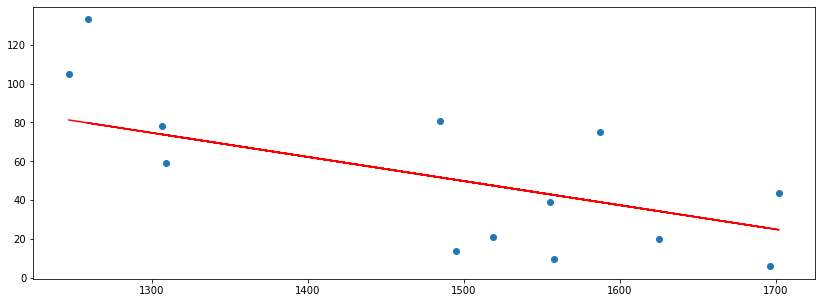

In [164]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [165]:
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % 
# У меня  отрицательный коэффициент, говорит о крайней неадекватности модели: простое среднее приближает лучше.

In [166]:
South = df.loc[df['location'] =='South'] 
North = df.loc[df['location'] =='North'] 

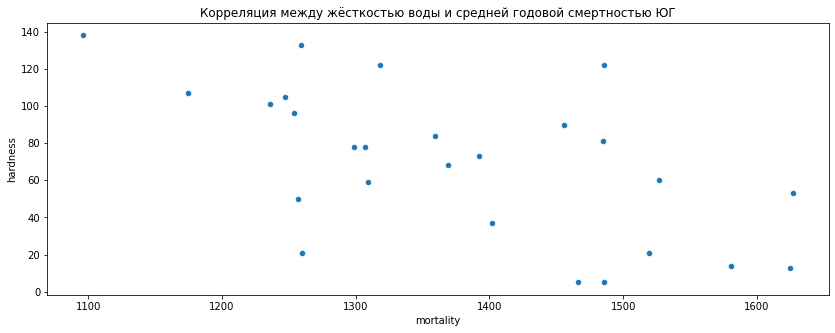

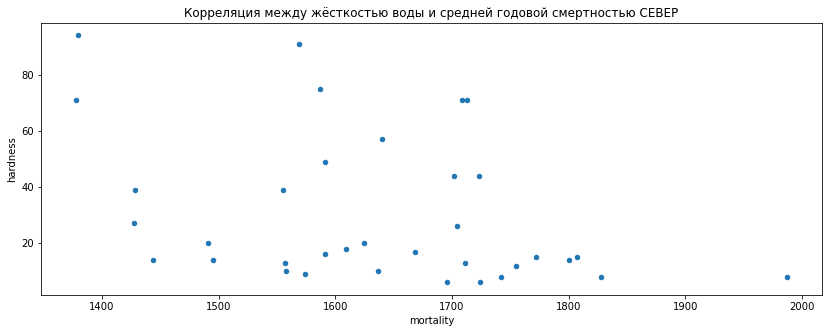

In [167]:
South.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью ЮГ')
plt.show()
North.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью СЕВЕР')
plt.show()

In [168]:
South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [169]:
South[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [170]:
North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [171]:
North[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [172]:
#Корреляция у юга выше, чем у северных районов. У севера корреляция слабая

In [173]:
X = South[['mortality']]
y = South['hardness']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#у меня мало данных, поэтому на проверку беру минимум

In [175]:
X_train.shape

(20, 1)

In [176]:
y_train.shape

(20,)

In [177]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.18719121])

In [178]:
model.intercept_

328.40514880379476

In [179]:
y_pred = model.predict(X_test)
y_pred

array([81.68713581, 50.23901276, 94.97771163, 50.23901276, 65.96307429,
       92.54422592])

In [180]:
model.score(X_test, y_test)

-0.03779527449563225

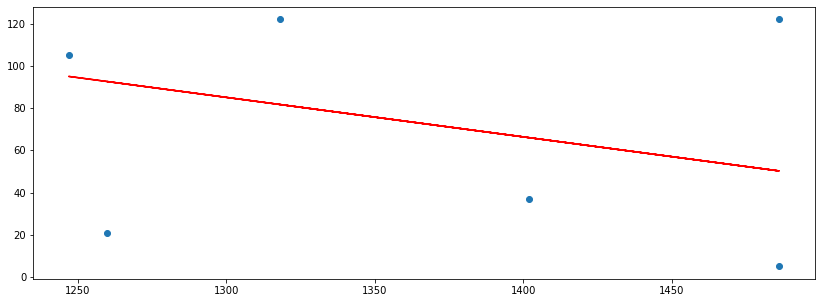

In [181]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [182]:
#Нелинейная зависимость, анализ остатков плохой

In [107]:
X = North[['mortality']]
y = North['hardness']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)
X_train.shape

(28, 1)

In [138]:
y_train.shape

(28,)

In [139]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.09666434])

In [140]:
model.intercept_

188.8758634821093

In [141]:
y_pred = model.predict(X_test)
y_pred

array([-3.19617588, 36.72619566, 49.29255959, 22.22654498, 35.08290192,
       23.2898527 , 24.35316041])

In [142]:
model.score(X_test, y_test)

-0.5174330384125665

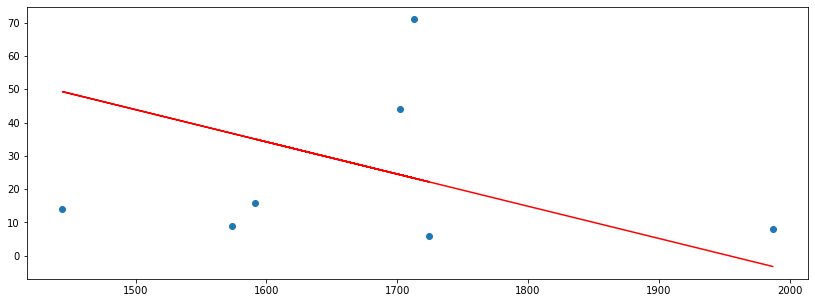

In [114]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')